<a href="https://colab.research.google.com/github/anapitalai/gee/blob/main/python_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Variables**

In [ ]:
name = "Joshua"
age = 25
height = 5.7
is_student = True

# Print them
print(name, age, height, is_student)


Joshua 25 5.7 True


In [ ]:
#List and Dictionaries
fruits = ["apple", "banana", "cherry"]
fruits.append("orange")
print(fruits)

person = {"name": "John", "age": 30, "city": "New York"}
print(person["name"])

['apple', 'banana', 'cherry', 'orange']
John


**Loops**

In [ ]:
names=['Alois','James','Steven','Joshua']
for n in names:
  print(n)


Alois
James
Steven
Joshua


**Conditional**

In [ ]:
age = 18

if age >= 18:
    print("Eligible to vote")
else:
    print("Not eligible to vote")


Eligible to vote


**Functions**

In [ ]:
def calculator(a, b, operation):
    if operation == "add":
        return a + b
    elif operation == "subtract":
        return a - b

**Classes**



In [ ]:
class House:
    def __init__(self, name,street,occupant):
        self.name = name
        self.street = street
        self.occupant = occupant

    def print_occupant(self):
        name = self.name
        occupant = self.occupant
        return (f"{occupant} lives in {self.name}")

    def relocation(self,new_house):
        self.name = new_house
        return (f"Moved to {new_house}")

    #return the memory location is __str__ is not overidden.
    def __str__(self):
        return f"House: {self.name}, Street: {self.street}, Occupant: {self.occupant}"

#create new object
house_1=House('#66','Sogeri','Alois Napitalai')
print(house_1)
print(house_1.print_occupant())
print(house_1.relocation('Kilimani'))


House: #66, Street: Sogeri, Occupant: Alois Napitalai
Alois Napitalai lives in #66
Moved to Kilimani


In [ ]:
#multiple parameters
def greet_all(*names):
    for name in names:
        print(f"Hello, {name}!")

greet_all("Alice", "Bob", "Charlie")

def multiply_all(*args):
    result = 1
    for num in args:
        result *= num
    return result

print(multiply_all(2, 3, 4,5))  # Output: 24


Hello, Alice!
Hello, Bob!
Hello, Charlie!
120


In [ ]:
#Encapsulation
class BankAccount:
    def __init__(self, balance):
        self.__balance = balance  # Private variable

    def deposit(self, amount):
        self.__balance += amount

    def get_balance(self):
        return self.__balance

account = BankAccount(100)
account.deposit(50)
print(account.get_balance())
##The _balance property cant be accessed directly but through the method.


150


In [ ]:
#Inheritance
class Animal:
    def speak(self):
        return "Makes a sound"

class Dog(Animal):
    def speak(self):
        return "Barks"

class Cat(Animal):
    def speak(self):
        return "Meows"


class Dog(Animal):
    def speak(self):
        return "Barks"

dog = Dog()
print(dog.speak())  # Output: Barks
##Dog inherits from Animal but overrides speak().


Barks


In [ ]:
#Polymorphism
class Cat:
    def speak(self):
        return "Meows"

class Bird:
    def speak(self):
        return "Chirps"

def animal_sound(animal):
    print(animal.speak())

animal_sound(Cat())   # Output: Meows
animal_sound(Bird())  # Output: Chirps

##Each object responds differently to speak(), but the function animal_sound() doesn’t care what type of object it is.


Meows
Chirps


In [ ]:
#Functions

def add1(a,b):  ##arguments
  return a + b

c=add1(10,20)
print(c)


30


In [ ]:
#args and kwargs
def add(*args):
   sum = 0
   for a in args:
     sum += a
   return sum

add(1,2,3,4)

In [ ]:
def name_sake(**kwargs):
  return list(kwargs.values())


name_sake(first_name='Alois',last_name='Napitalai',middle_name='James')



['Alois', 'Napitalai', 'James']

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/2025/gps_utils')
from distance import haversine
from coordinates import GPSCoordinate
#from gps_utils import GPSCoordinate, haversine

point1 = GPSCoordinate(9.4438, 147.1803)   # Port Moresby, PNG
point2 = GPSCoordinate(-6.2146, 106.8451)  # Jakarta, Indonesia

print("Point 1:", point1)
print("Point 2:", point2)

dist = haversine(point1, point2)
print(f"Distance: {dist:.2f} km")

Point 1: GPSCoordinate(lat=9.4438, lon=147.1803)
Point 2: GPSCoordinate(lat=-6.2146, lon=106.8451)
Distance: 4796.26 km


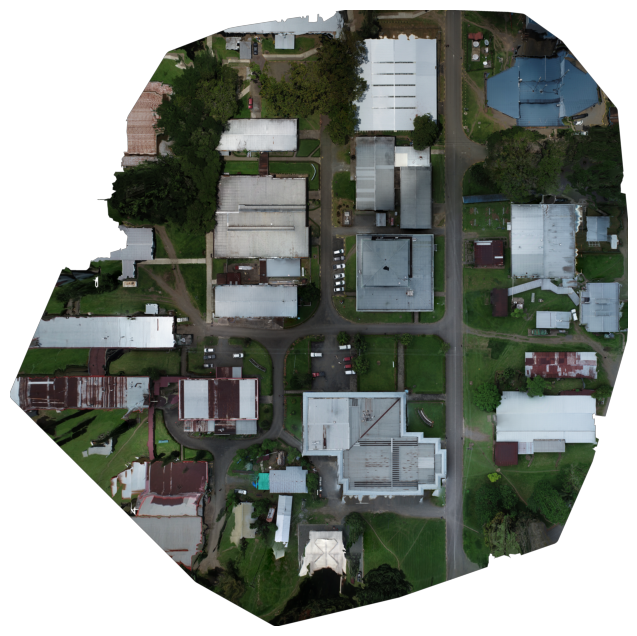

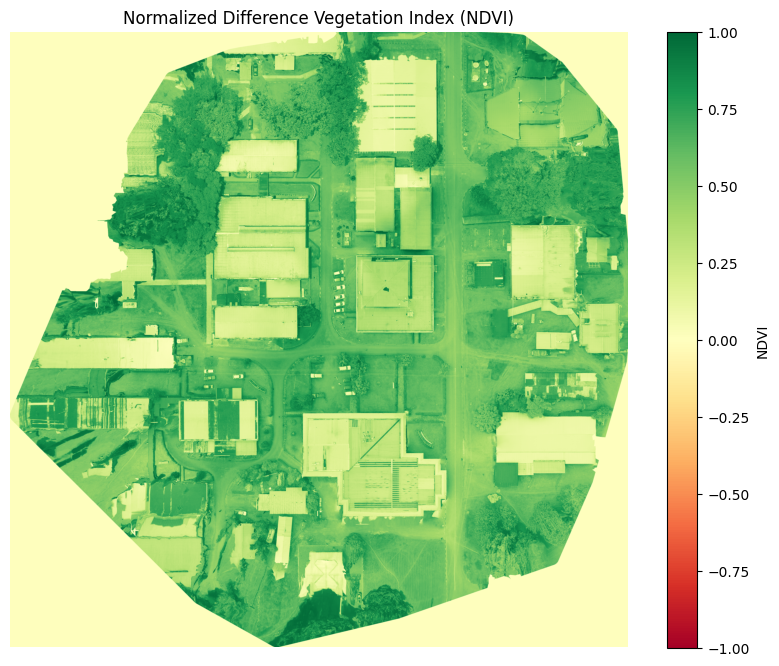

In [3]:
# prompt: load image into memory using matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming you have an image file named 'my_image.png' in your Colab environment
# If the image is in Google Drive, adjust the path accordingly
img = mpimg.imread('/content/drive/MyDrive/2025/unitech.tif')

plt.figure(figsize=(10, 8))  # Adjust the values (width, height) in inches

plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

##ndvi
img = img.astype(np.float32)

red_band = img[:, :, 1]
nir_band = img[:, :, 3]

# Calculate NDVI
# To avoid division by zero, replace zeros in the denominator with a small number
denominator = (nir_band + red_band)
denominator[denominator == 0] = 1e-9

ndvi = (nir_band - red_band) / denominator

# Display the NDVI image
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1) # Using a color map suitable for NDVI
plt.colorbar(label='NDVI') # Add a color bar to show the NDVI scale
plt.axis('off')
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.show()

### I have added the code block for NDWI using GEMINI AI, it speeds up your coding experience, the main thing is you knowing what the code does, hence you should be able to troubleshoot when things go wrong.

Image shape: (4, 5753, 5771)
Using bands 2 (Red) and 3 (NIR) for NDVI.


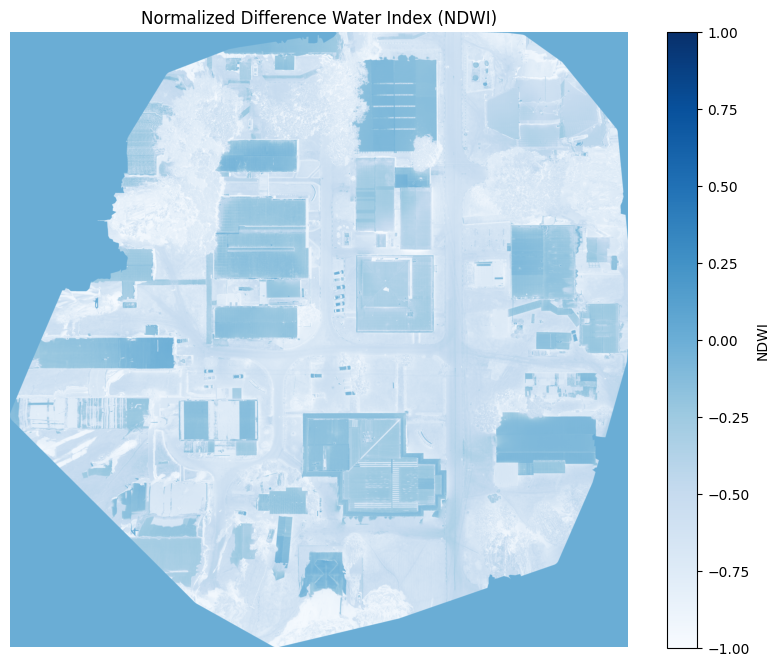

In [5]:
# prompt: NDWI code

!pip install rasterio
import numpy as np
import rasterio

with rasterio.open('/content/drive/MyDrive/2025/unitech.tif') as src:
    img = src.read()

# Check the number of bands
if img.shape[0] <= 4:
    print("Warning: Image does not appear to have enough bands for typical NDVI calculation (assuming NIR and Red bands).")
    print(f"Image shape: {img.shape}")
    # Attempt to proceed with the bands available, assuming the last two bands are Red and NIR
    if img.shape[0] >= 2:
      red_band = img[-2, :, :]
      nir_band = img[-1, :, :]
      print(f"Using bands {img.shape[0]-2} (Red) and {img.shape[0]-1} (NIR) for NDVI.")
    else:
      print("Error: Not enough bands to calculate NDVI.")
      red_band = None
      nir_band = None
else:
    # Assuming band 1 (index 0) is Blue, band 2 (index 1) is Green, band 3 (index 2) is Red, band 4 (index 3) is NIR
    # Adjust indices if your image band order is different
    red_band = img[2, :, :] # Assuming Red is the 3rd band (index 2)
    nir_band = img[3, :, :] # Assuming NIR is the 4th band (index 3)


if red_band is not None and nir_band is not None:
  # Convert bands to float32 for calculations
  red_band = red_band.astype(np.float32)
  nir_band = nir_band.astype(np.float32)

  # Calculate NDWI (Normalized Difference Water Index)
  # NDWI = (Green - NIR) / (Green + NIR)
  # This requires a Green band. Assuming Green is the 2nd band (index 1)

  if img.shape[0] >= 2:
      green_band = img[1, :, :] # Assuming Green is the 2nd band (index 1)
      green_band = green_band.astype(np.float32)

      # To avoid division by zero, replace zeros in the denominator with a small number
      denominator_ndwi = (green_band + nir_band)
      denominator_ndwi[denominator_ndwi == 0] = 1e-9

      ndwi = (green_band - nir_band) / denominator_ndwi

      # Display the NDWI image
      plt.figure(figsize=(10, 8))
      plt.imshow(ndwi, cmap='Blues', vmin=-1, vmax=1) # Using a color map suitable for water
      plt.colorbar(label='NDWI') # Add a color bar to show the NDWI scale
      plt.axis('off')
      plt.title('Normalized Difference Water Index (NDWI)')
      plt.show()

  else:
      print("Error: Not enough bands to calculate NDWI (requires Green and NIR bands).")




### Upscaling an image using AI

In [1]:
!pip -q install https://storage.googleapis.com/0x7ff601307fa5/s2dr3-20250307.1-cp311-cp311-linux_x86_64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.

Fetching data for T16TGP-90963b14b-20240720 .......... done. 
Processing S2L2A_T16TGP-90963b14b-20240720_MS . done 
Postprocessing S2L2A_T16TGP-90963b14b-20240720_MS ......... done

Find results at the following path: /content/output
Click the link below for preview:

https://gamayos.github.io/gamma-earth-api/s2dr3-demo-20250305.html?ds=US-T16TGP-90963b14b-20240720#15/43.4400/-83.7400



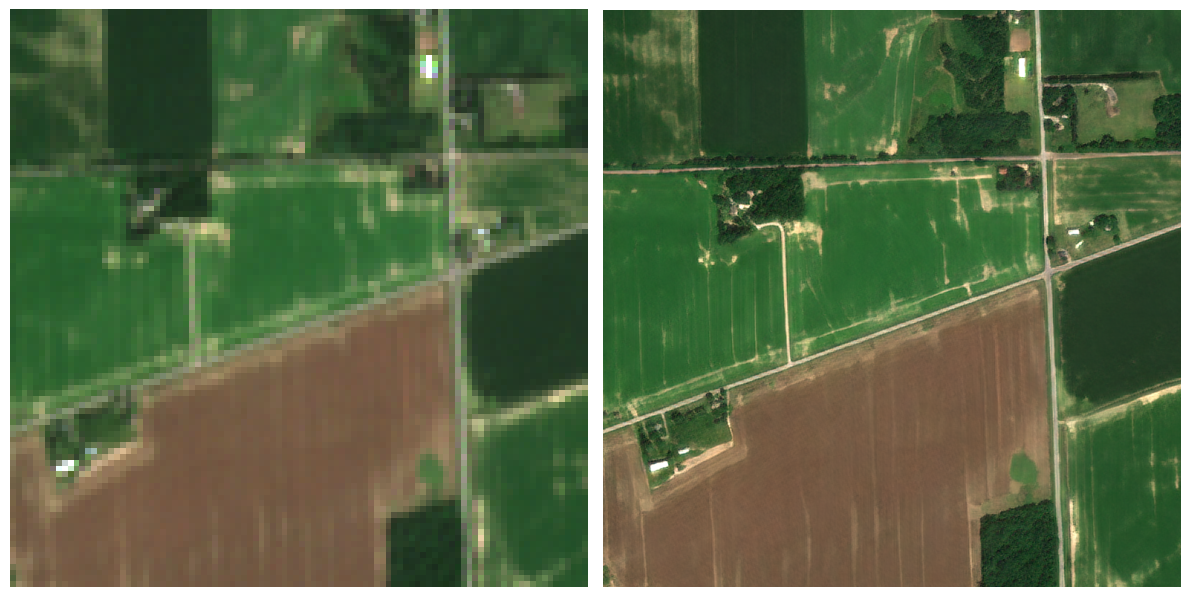

In [6]:
import s2dr3.inferutils

lonlat = (-83.74,43.44) # NOTE THE X,Y FORMAT!

# Specify the target date. Please note, S2DR3 model will process the date
# from the Sentinel-2 catalogue that is closest to the specified date.
# Selected date may be ocluded by clouds. Please consult the Copernucus
# Dataspace for data availability https://browser.dataspace.copernicus.eu
# Archive images are available from 2018-01-01.
date = '2024-07-20'



s2dr3.inferutils.test(lonlat, date)